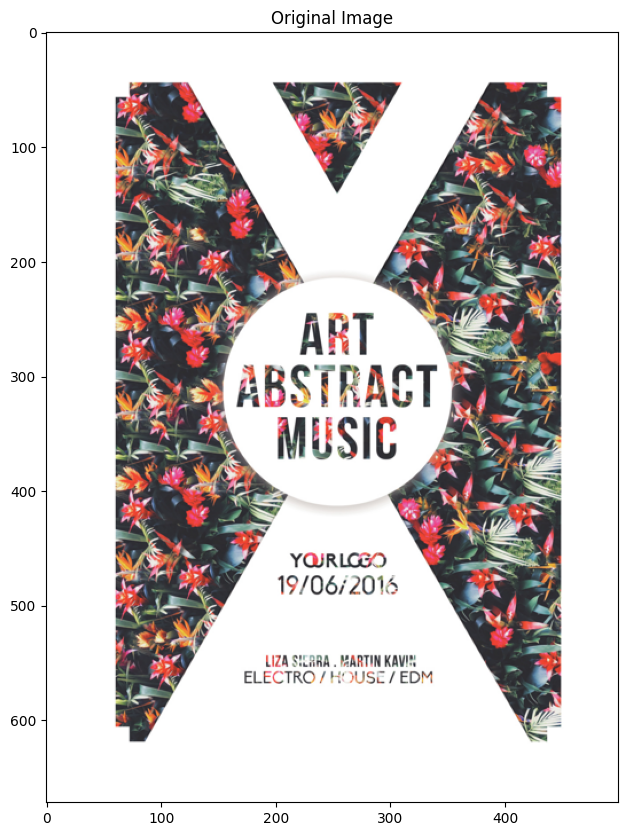

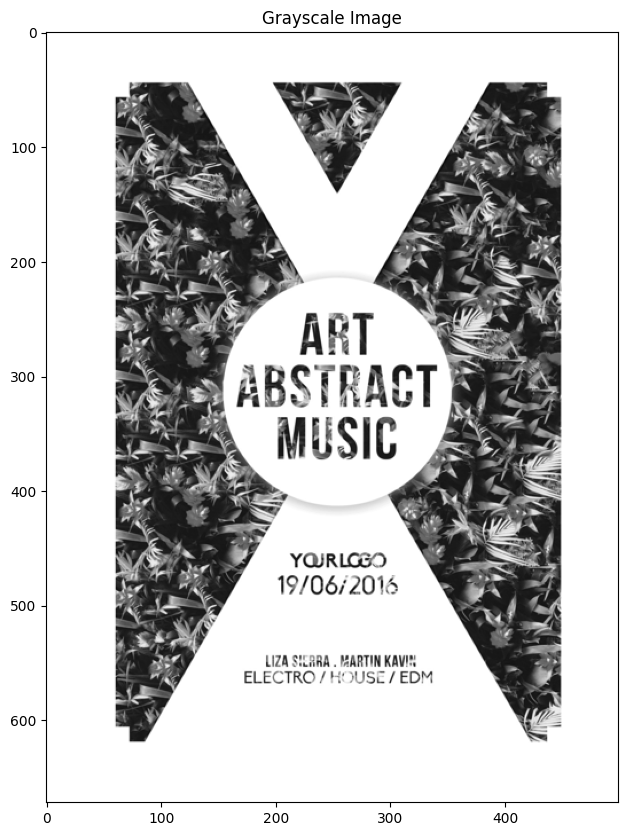

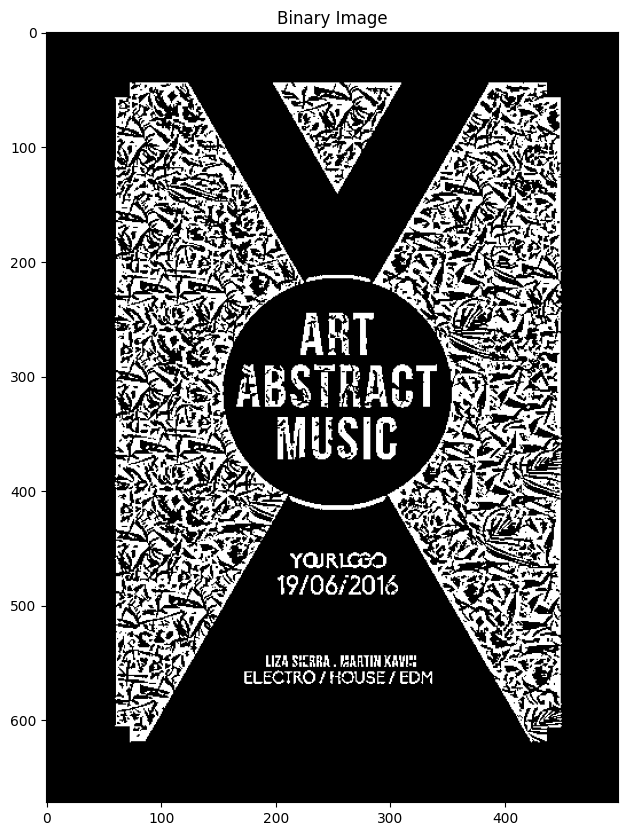

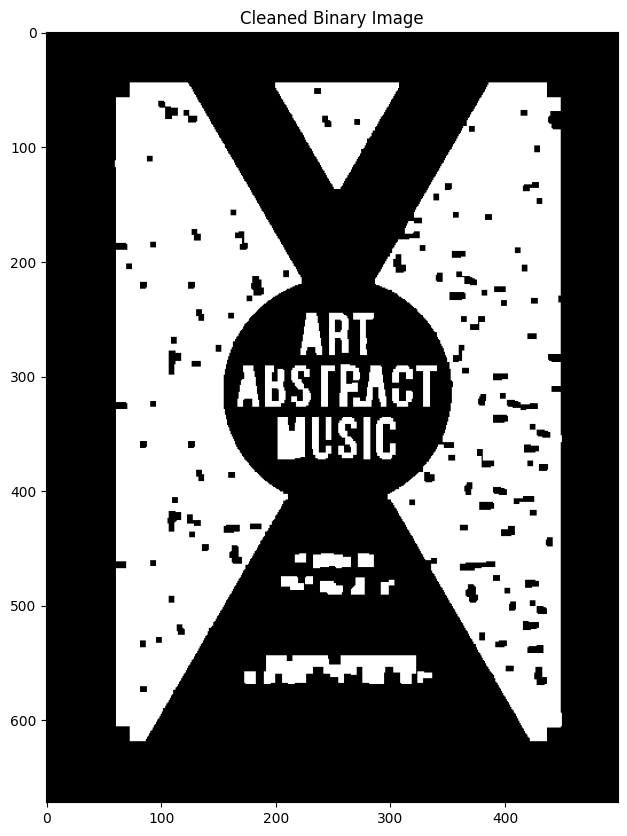

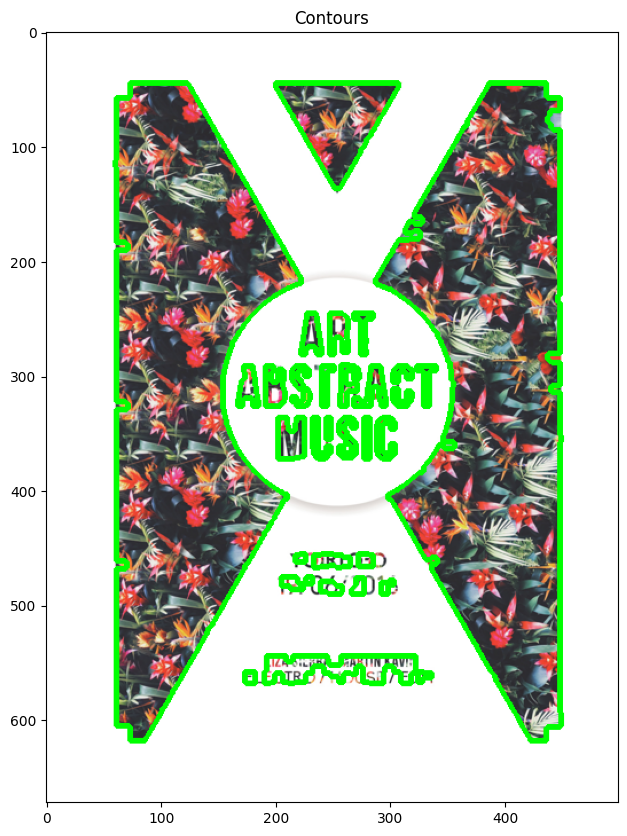

C:\Users\Xingyan Liu\AppData\Local\Temp\ipykernel_26532\2418955924.py:65: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


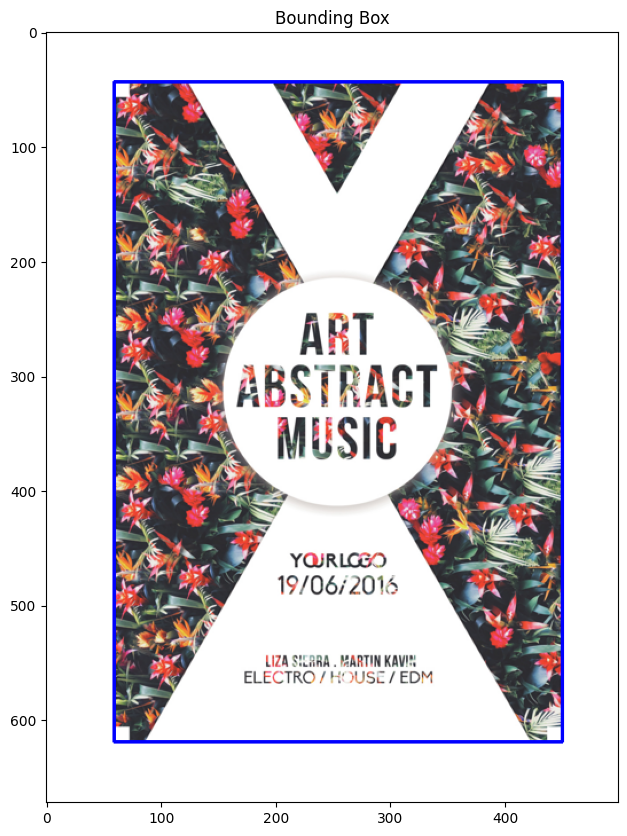

Upper white edge length: 43 pixels
Lower white edge length: 53 pixels


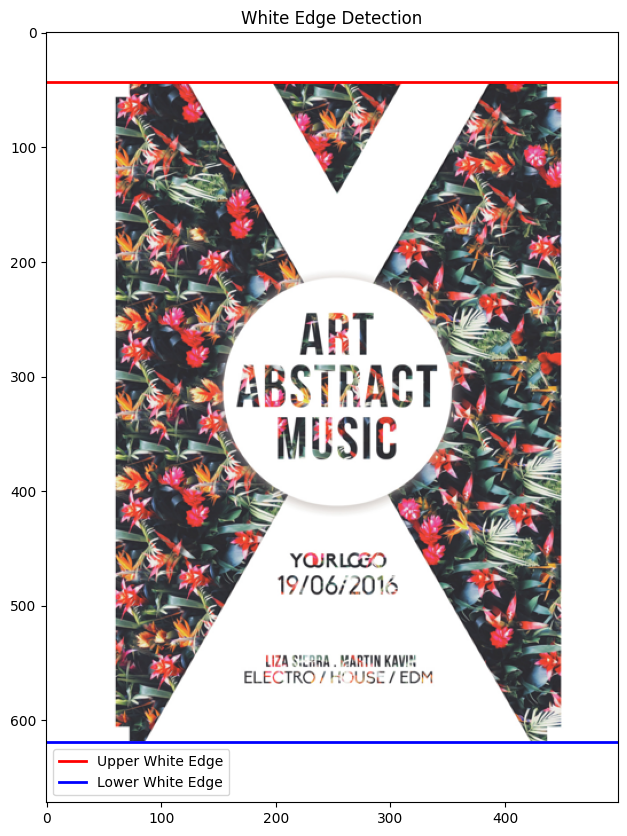

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取图片
image_path = 'poster.png'
image = cv2.imread(image_path)

# 显示原始图片
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

# 转换为灰度图
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 显示灰度图片
plt.figure(figsize=(10, 10))
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.show()

# 应用高斯自适应阈值得到二值图
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# 显示二值图
plt.figure(figsize=(10, 10))
plt.imshow(binary, cmap='gray')
plt.title('Binary Image')
plt.show()

# 定义结构元素
kernel = np.ones((5, 5), np.uint8)
# 使用闭运算和开运算清理二值图像
binary_cleaned = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
binary_cleaned = cv2.morphologyEx(binary_cleaned, cv2.MORPH_OPEN, kernel)

# 显示清理后的二值图像
plt.figure(figsize=(10, 10))
plt.imshow(binary_cleaned, cmap='gray')
plt.title('Cleaned Binary Image')
plt.show()

# 查找轮廓
contours, _ = cv2.findContours(binary_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 绘制轮廓
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 3)

# 显示带轮廓的图像
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.show()

# 初始化边界框的坐标
x_min, y_min, x_max, y_max = image.shape[1], image.shape[0], 0, 0

# 计算边界框
for contour in contours:
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    x, y, w, h = cv2.boundingRect(box)
    if cv2.contourArea(contour) > 100: 
        x_min = min(x_min, x)
        y_min = min(y_min, y)
        x_max = max(x_max, x + w)
        y_max = max(y_max, y + h)

bounding_box_image = image.copy()
cv2.rectangle(bounding_box_image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(bounding_box_image, cv2.COLOR_BGR2RGB))
plt.title('Bounding Box')
plt.show()

upper_white_edge = y_min
lower_white_edge = image.shape[0] - y_max

print(f'Upper white edge length: {upper_white_edge} pixels')
print(f'Lower white edge length: {lower_white_edge} pixels')

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axhline(y=upper_white_edge, color='r', linestyle='-', linewidth=2, label='Upper White Edge')
plt.axhline(y=y_max, color='b', linestyle='-', linewidth=2, label='Lower White Edge')
plt.legend()
plt.title('White Edge Detection')
plt.show()